In [23]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = 'alanine_and_glycine_filtered'

In [3]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [4]:
train_0_dir = os.path.join(train_dir, 'alanine')  # directory with our training cat pictures
train_1_dir = os.path.join(train_dir, 'glycine')  # directory with our training dog pictures
validation_0_dir = os.path.join(validation_dir, 'alanine')  # directory with our validation cat pictures
validation_1_dir = os.path.join(validation_dir, 'glycine')  # directory with our validation dog pictures

In [5]:
num_0_tr = len(os.listdir(train_0_dir))
num_1_tr = len(os.listdir(train_1_dir))

num_0_val = len(os.listdir(validation_0_dir))
num_1_val = len(os.listdir(validation_1_dir))

total_train = num_0_tr + num_1_tr
total_val = num_0_val + num_1_val

In [6]:
print('total training alanine images:', num_0_tr)
print('total training glycine images:', num_1_tr)

print('total validation alanine images:', num_0_val)
print('total validation glycine images:', num_1_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training alanine images: 720
total training glycine images: 720
total validation alanine images: 360
total validation glycine images: 360
--
Total training images: 1440
Total validation images: 720


In [7]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 1440 images belonging to 2 classes.


In [10]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 720 images belonging to 2 classes.


In [11]:
sample_training_images, _ = next(train_data_gen)

In [12]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [13]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

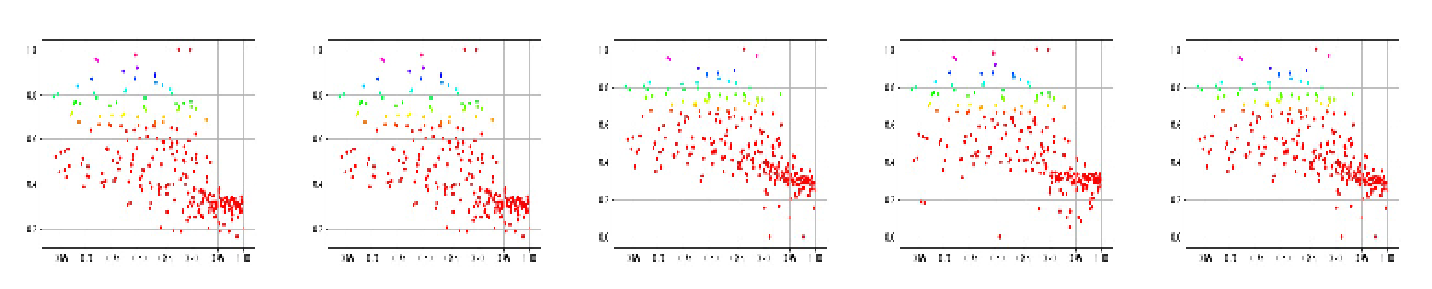

In [14]:
plotImages(sample_training_images[:5])

In [15]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [18]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
11/11 [==============================] - 13s 1s/step - loss: 1.2222 - accuracy: 0.5305 - val_loss: 0.6497 - val_accuracy: 1.0000
Epoch 2/15
11/11 [==============================] - 12s 1s/step - loss: 0.5724 - accuracy: 0.8453 - val_loss: 0.3356 - val_accuracy: 1.0000
Epoch 3/15
11/11 [==============================] - 12s 1s/step - loss: 0.1945 - accuracy: 1.0000 - val_loss: 0.0477 - val_accuracy: 1.0000
Epoch 4/15
11/11 [==============================] - 13s 1s/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 5/15
11/11 [==============================] - 12s 1s/step - loss: 4.2820e-04 - accuracy: 1.0000 - val_loss: 2.7834e-06 - val_accuracy: 1.0000
Epoch 6/15
11/11 [==============================] - 12s 1s/step - loss: 4.1464e-05 - accuracy: 1.0000 - val_loss: 3.5353e-07 - val_accuracy: 1.0000
Epoch 7/15
11/11 [==============================] 

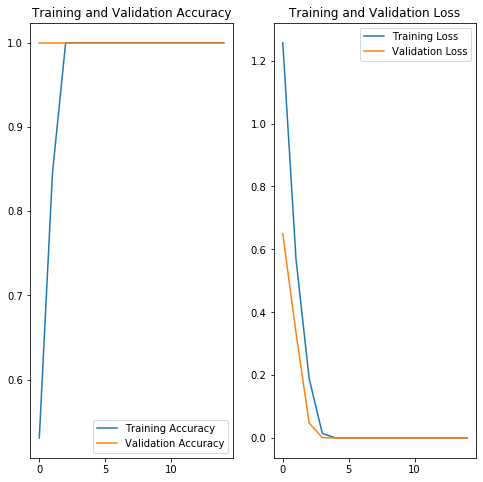

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
predict_class=model.predict_classes(sample_training_images)
print(predict_class[0:10].T)

[[0 0 1 0 1 0 1 0 1 0]]


In [21]:
model.predict_classes(sample_training_images[:1, :], verbose=0)

array([[0]], dtype=int32)

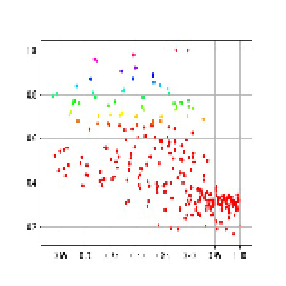

In [22]:
plt.figure(figsize=(5, 5))
plt.imshow(sample_training_images[0])
plt.grid(False)
plt.axis("off")
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------

데이터 변형을 통해 노이즈 대비

In [115]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [116]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 1440 images belonging to 2 classes.


In [117]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

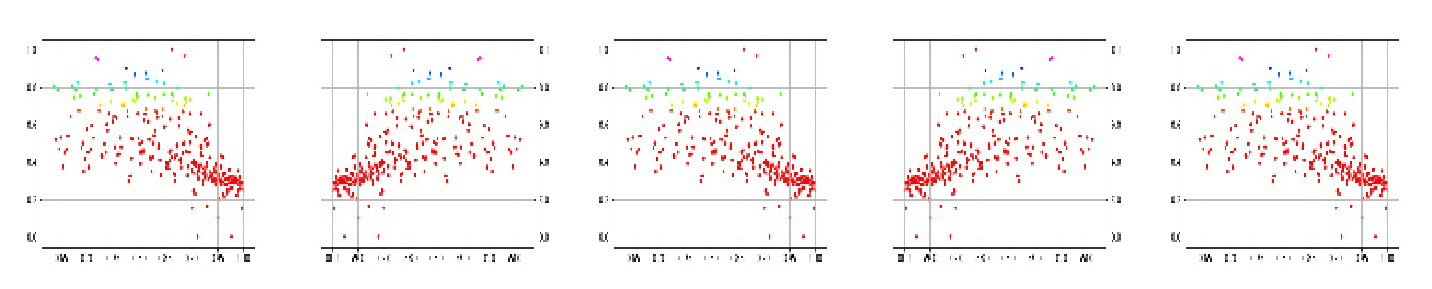

In [118]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

In [119]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [120]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 1440 images belonging to 2 classes.


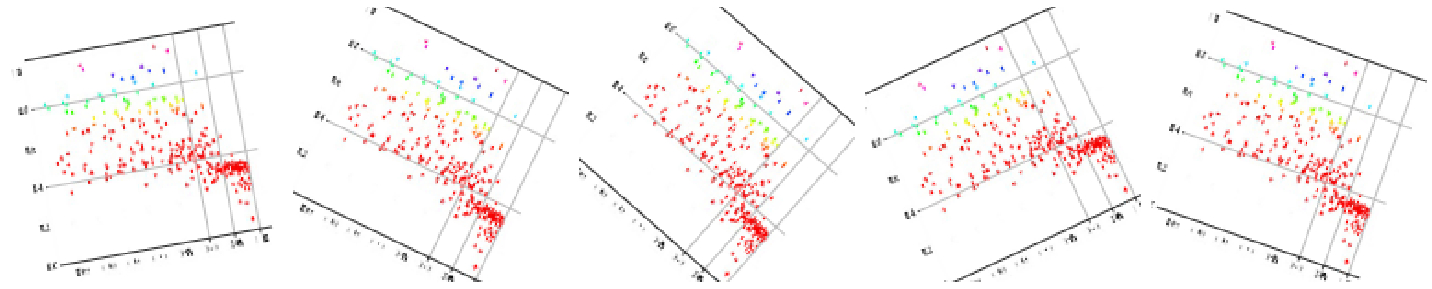

In [121]:
plotImages(augmented_images)

In [122]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

In [123]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 1440 images belonging to 2 classes.


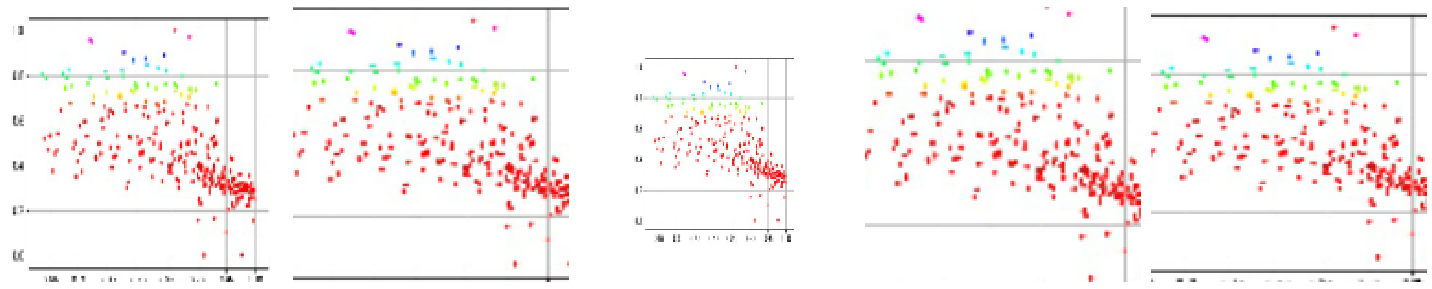

In [124]:
plotImages(augmented_images)

In [125]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [126]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 1440 images belonging to 2 classes.


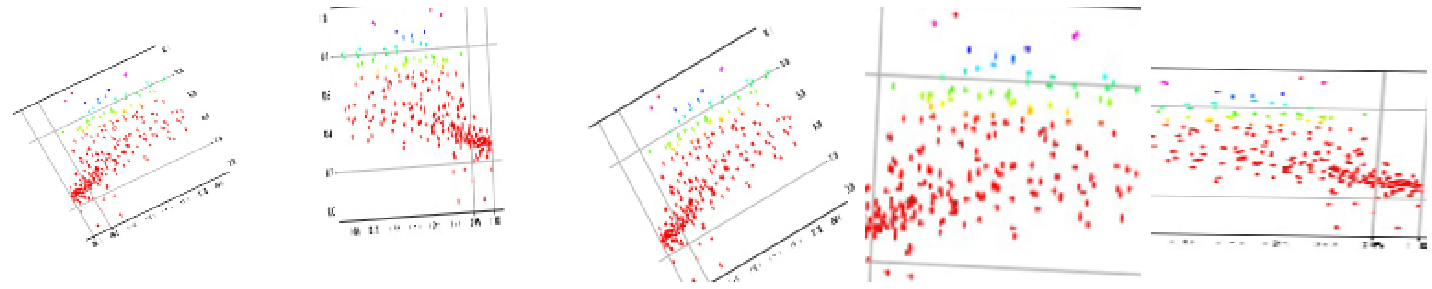

In [127]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [128]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [129]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 720 images belonging to 2 classes.


In [130]:
def create_model():
    model_new = Sequential([
        Conv2D(16, 3, padding='same', activation='relu', 
               input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
        MaxPooling2D(),
        Dropout(0.2),
        Conv2D(32, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(64, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Dropout(0.2),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')
])

In [131]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 64)       

In [132]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
22/22 [==============================] - 17s 754ms/step - loss: 7.8092 - accuracy: 0.4964 - val_loss: 7.6906 - val_accuracy: 0.5014
Epoch 2/15
22/22 [==============================] - 16s 709ms/step - loss: 7.6139 - accuracy: 0.5064 - val_loss: 7.6906 - val_accuracy: 0.5014
Epoch 3/15
22/22 [==============================] - 15s 679ms/step - loss: 7.7664 - accuracy: 0.4978 - val_loss: 7.6906 - val_accuracy: 0.5014
Epoch 4/15
22/22 [==============================] - 15s 686ms/step - loss: 7.7883 - accuracy: 0.4964 - val_loss: 7.6906 - val_accuracy: 0.5014
Epoch 5/15
22/22 [==============================] - 15s 687ms/step - loss: 7.7130 - accuracy: 0.4993 - val_loss: 7.6906 - val_accuracy: 0.5014
Epoch 6/15
22/22 [==============================] - 15s 686ms/step - loss: 7.7978 - accuracy: 0.4978 - val_loss: 7.6906 - val_accuracy: 0.5014
Epoch 7/15
22/22 [==============================] - 15s 687ms/step - loss: 7.7339 - accuracy: 0.4993 - val_loss: 7.6906 - val_accuracy: 0.5014

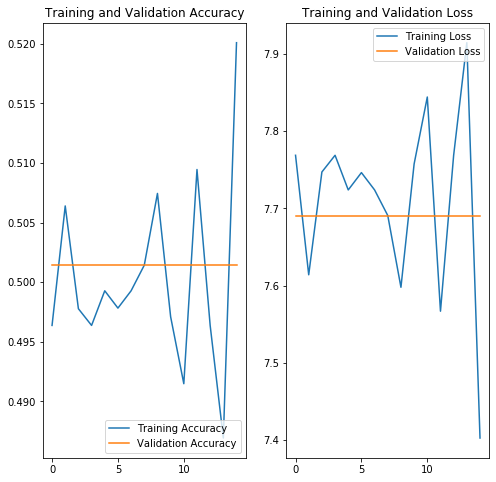

In [133]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [151]:
predict_class=model.predict_classes(sample_training_images)
print(predict_class[0:100].T)

[[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0
  0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0]]


In [152]:
np.argmax(predictions[12])

0